In [1]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# plotting the basic map of the earth
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/f1/1727nmns4pn3qwy09yz08x2r0000gn/T/ipykernel_10568/2518498938.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [8]:
locations = {
    'Location': ['Lisbon', 'Lima', 'Boston', 'Amsterdam', 'Washington DC', 'Paris', 'Budapest', 'Vienna', 'Salzburg', 'Innsbruck'],
    'Latitude': [38.7223, -12.0464, 42.3601, 52.3676, 38.9072, 48.8566, 47.4979, 48.2082, 47.8095, 47.2692],
    'Longitude': [-9.1393, -77.0428, -71.0589, 4.9041, -77.0369, 2.3522, 19.0402, 16.3738, 13.0550, 11.4041]
}
locations_df = pd.DataFrame(locations)

In [9]:
locations_df

,Location,Latitude,Longitude
0,Lisbon,38.7223,-9.1393
1,Lima,-12.0464,-77.0428
2,Boston,42.3601,-71.0589
3,Amsterdam,52.3676,4.9041
4,Washington DC,38.9072,-77.0369
5,Paris,48.8566,2.3522
6,Budapest,47.4979,19.0402
7,Vienna,48.2082,16.3738
8,Salzburg,47.8095,13.0550
9,Innsbruck,47.2692,11.4041


## Hunger Games

In [21]:
hg_drop = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)",
    "Africa",
    "Asia",
    "Oceania", 
    "Europe"
])
hg = world.drop(world[hg_drop].index)
hg_df = locations_df[(locations_df["Location"] == "Boston") | (locations_df["Location"] == "Lima") | (locations_df["Location"] == "Washington DC")]
x = hg_df["Longitude"]
y = hg_df["Latitude"]

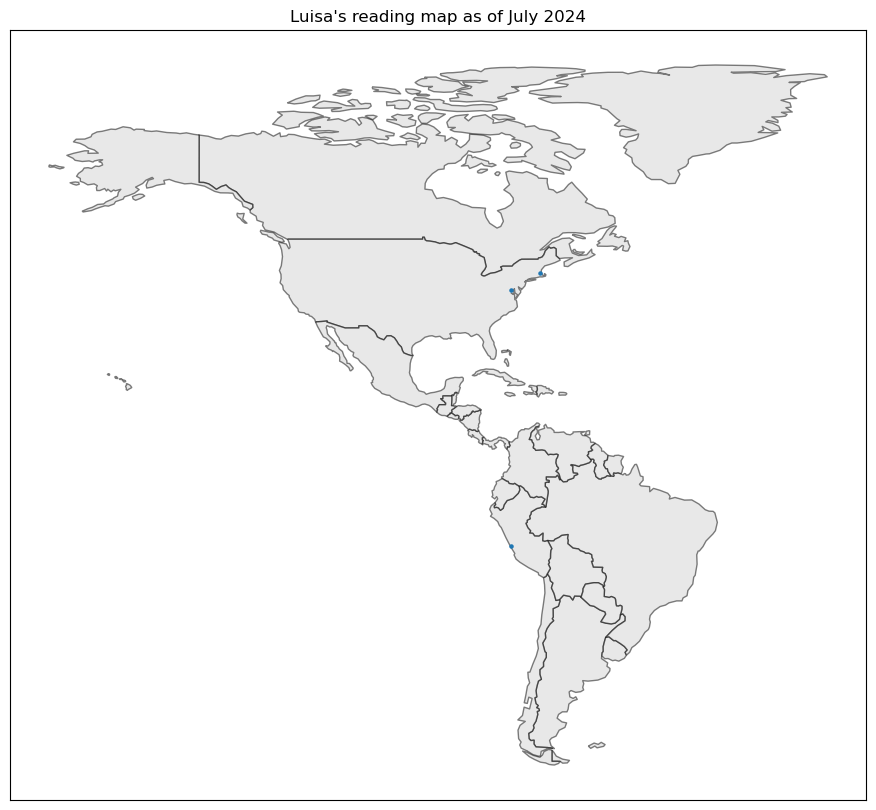

In [22]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

hg.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

ax.set_xticks([])
ax.set_yticks([])

plt.scatter(x, y, s=5)

plt.title("Luisa's reading map as of July 2024")
plt.show()